In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
datak1 = pd.read_csv("500 cross k1.csv", sep=';')
datak2 = pd.read_csv("500 cross k2.csv", sep=';')
datak3 = pd.read_csv("500 cross k3.csv", sep=';')
datak4 = pd.read_csv("500 cross k4.csv", sep=';')
sns.set()

In [3]:
filtro1 = (datak1['Metodo'] == 1)
filtro2 = (datak1['Metodo'] == 2)
filtro3 = (datak1['Metodo'] == 3)
filtro4 = (datak1['Metodo'] == 4)
data1k1 = datak1.loc[filtro1,:]
data2k1 = datak1.loc[filtro2,:]
data3k1 = datak1.loc[filtro3,:]
data4k1 = datak1.loc[filtro4,:]
data_mean1 = data1k1['MMRE'].expanding().mean()
data_mean2 = data2k1['MMRE'].expanding().mean()
data_mean2.index = range(500)
data_mean3 = data3k1['MMRE'].expanding().mean()
data_mean3.index = range(500)
data_mean4 = data4k1['MMRE'].expanding().mean()
data_mean4.index = range(500)
filtro1 = (datak2['Metodo'] == 1)
filtro2 = (datak2['Metodo'] == 2)
filtro3 = (datak2['Metodo'] == 3)
filtro4 = (datak2['Metodo'] == 4)
data1k2 = datak2.loc[filtro1,:]
data2k2 = datak2.loc[filtro2,:]
data3k2 = datak2.loc[filtro3,:]
data4k2 = datak2.loc[filtro4,:]
filtro1 = (datak3['Metodo'] == 1)
filtro2 = (datak3['Metodo'] == 2)
filtro3 = (datak3['Metodo'] == 3)
filtro4 = (datak3['Metodo'] == 4)
data1k3 = datak3.loc[filtro1,:]
data2k3 = datak3.loc[filtro2,:]
data3k3 = datak3.loc[filtro3,:]
data4k3 = datak3.loc[filtro4,:]
filtro1 = (datak4['Metodo'] == 1)
filtro2 = (datak4['Metodo'] == 2)
filtro3 = (datak4['Metodo'] == 3)
filtro4 = (datak4['Metodo'] == 4)
data1k4 = datak4.loc[filtro1,:]
data2k4 = datak4.loc[filtro2,:]
data3k4 = datak4.loc[filtro3,:]
data4k4 = datak4.loc[filtro4,:]

In [ ]:
datafig2_1 = pd.DataFrame({
'MI_1L':data_mean1,
'mRMR_1L':data_mean2,
'MI_2L':data_mean3,
'mRMR_2L':data_mean4})
datafig2_1.plot(figsize=(16, 8))

In [ ]:
plt.figure(figsize=(15,8))
datafig2 = pd.DataFrame({
'Iteraciones':range(500),
'MI_1L':data_mean1,
'mRMR_1L':data_mean2,
'MI_2L':data_mean3,
'mRMR_2L':data_mean4})
sns.lineplot(data=pd.melt(datafig2, ['Iteraciones'], var_name='Algoritmo', value_name='MMRE media'), x='Iteraciones', y='MMRE media', hue='Algoritmo')

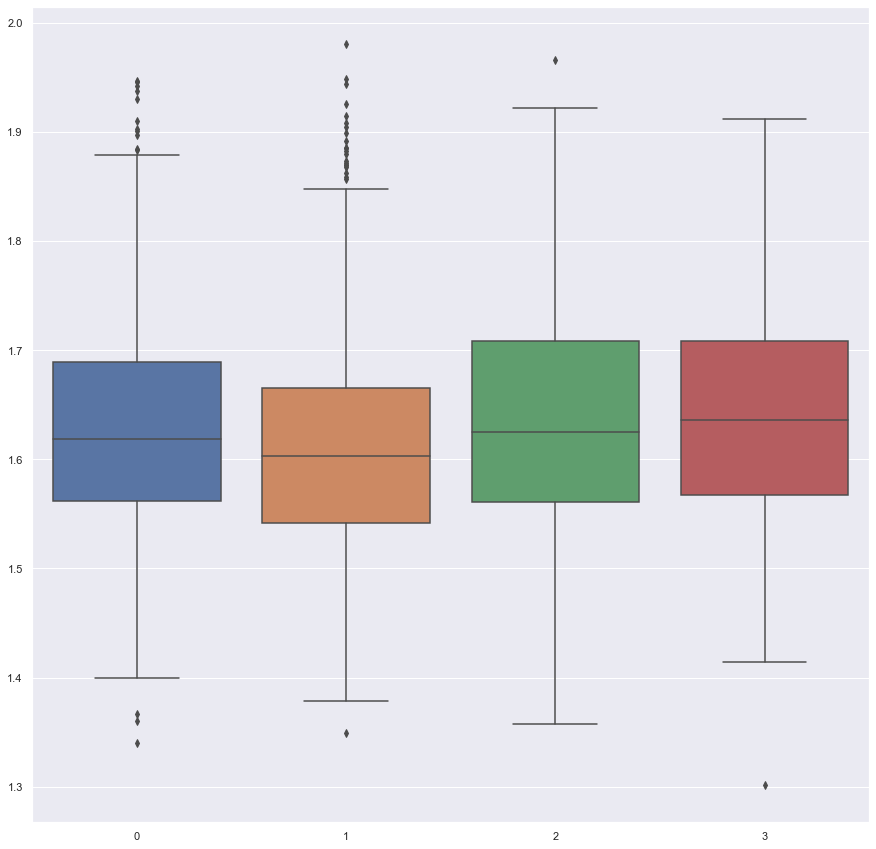

In [8]:
plt.figure(figsize=(15,15))
sns.boxplot(data=[data1k1['MMRE'], data2k1['MMRE'], data3k1['MMRE'], data4k1['MMRE']])

In [ ]:
#Tolerancia con MI_1L
i = 0
valor_anterior = 0
repeticiones = 0
for index, value in data_mean1.iteritems():
    if abs((valor_anterior / value) - 1) < 0.0003 :
        repeticiones += 1
    else:
        repeticiones = 0
    if repeticiones == 50:
        print('El resultado es', i)
        break
    i += 1
    valor_anterior = value

In [5]:
#Tabla 4
data_table4 = {'MI_1L':[data1k1['MMRE'].mean(), data1k2['MMRE'].mean(), data1k3['MMRE'].mean(), data1k4['MMRE'].mean()], 'mRMR_1L':[data2k1['MMRE'].mean(), data2k2['MMRE'].mean(), data2k3['MMRE'].mean(), data2k4['MMRE'].mean()], 'MI_2L':[data3k1['MMRE'].mean(), data3k2['MMRE'].mean(), data3k3['MMRE'].mean(), data3k4['MMRE'].mean()], 'mRMR_2L':[data4k1['MMRE'].mean(), data4k2['MMRE'].mean(), data4k3['MMRE'].mean(), data4k4['MMRE'].mean()]}
table4df = pd.DataFrame(data_table4, index=['K = 1', 'K = 2', 'K = 3', 'K = 4'])
table4df

,MI_1L,mRMR_1L,MI_2L,mRMR_2L
K = 1,1.631567,1.615291,1.639942,1.644234
K = 2,1.564081,1.571283,1.592054,1.583667
K = 3,1.557674,1.547511,1.520141,1.517357
K = 4,1.560708,1.552784,1.529812,1.533162


In [6]:
#Table 5
data_table5 = {'Media':[data1k1['Tiempo'].mean(), data2k1['Tiempo'].mean(), data3k1['Tiempo'].mean(), data4k1['Tiempo'].mean()], 'Desviación Típica':[data1k1['Tiempo'].std(), data2k1['Tiempo'].std(), data3k1['Tiempo'].std(), data4k1['Tiempo'].std()]}
table5df = pd.DataFrame(data_table5, index=['MI_1L', 'mRMR_1L', 'MI_2L', 'mRMR_2L'])
table5df

,Media,Desviación Típica
MI_1L,25.718709,0.133100
mRMR_1L,26.084951,0.289649
MI_2L,36.213037,4.268400
mRMR_2L,36.141190,4.051913


In [ ]:
data_variables = data['Variables Elegidas']
for item in data_variables.iteritems():
    print(item[1])